LetsGrowMore Virtual Internship Program

Task : Develop A Neural Network That Can Read Handwriting.

In [71]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Load the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
# Finding the shape of individual sample
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

See the images

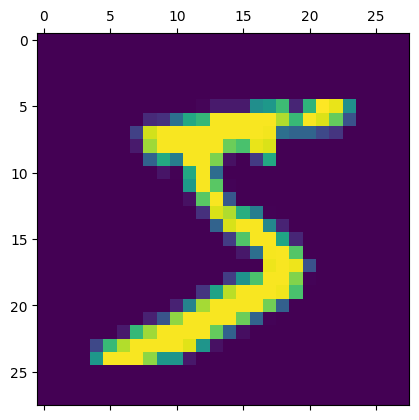

In [18]:
plt.matshow(x_train[0])

In [19]:
y_train[0]

5

In [20]:
# Show first 5 data
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Flatten the training data

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255

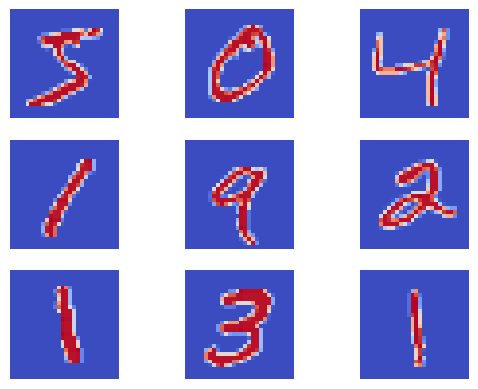

In [31]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i],cmap=plt.cm.coolwarm)
  plt.axis(False)
     

In [32]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [33]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [34]:
x_train_flattened.shape

(60000, 784)

Create a simple neural network in keras

In [35]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1880 - accuracy: 0.5787
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9767 - accuracy: 0.7074
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7902 - accuracy: 0.7385
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6266 - accuracy: 0.7606
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4838 - accuracy: 0.7761


Evaluate the accuracy on test data

In [36]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4039 - accuracy: 0.8016


[1.403896689414978, 0.8015999794006348]

Sample prediction

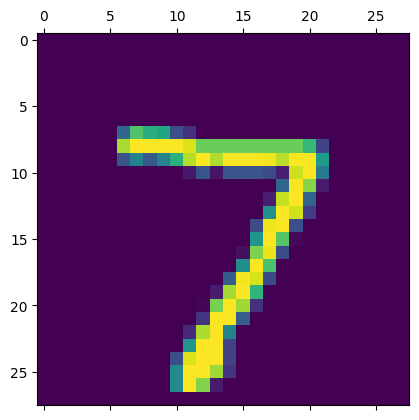

In [37]:
# Show the image
plt.matshow(x_test[0])

In [47]:
#imposing layers of neural network by using tensorflow
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, LSTM, Dropout
network=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128,activation="relu"),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [48]:
network.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [49]:

#performance of the network model evaluation
network.evaluate(x_test,y_test)

313/313 [==============================] - 3s 6ms/step - loss: 2.3028 - accuracy: 0.0573


[2.3028409481048584, 0.05730000138282776]

In [50]:
network.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1753 - accuracy: 0.7079
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4867 - accuracy: 0.8724
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3814 - accuracy: 0.8942
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3404 - accuracy: 0.9046
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3171 - accuracy: 0.9096


In [51]:
y_predict=[]
predict=network.predict(x_test)
for i in predict:
  y_predict.append(np.argmax(i)) 

313/313 [==============================] - 1s 2ms/step


In [52]:
y_predict=np.array(y_predict)
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [53]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

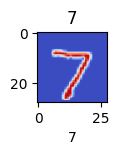

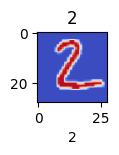

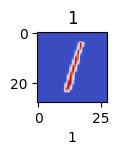

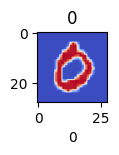

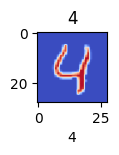

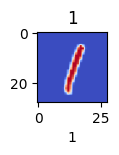

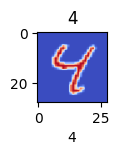

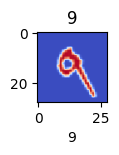

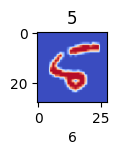

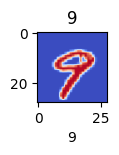

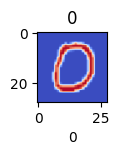

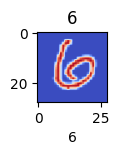

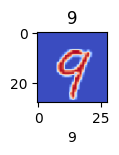

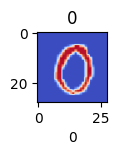

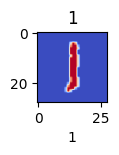

In [56]:
for i in range(0,15):
  plt.figure(figsize=(16,12))
  plt.subplot(1,15,i+1)
  plt.imshow(x_test[i],cmap=plt.cm.coolwarm)
  plt.xlabel(y_predict[i])
  plt.title(y_test[i])

In [59]:
#representing in the tabular form 
real_val=y_test
predicted=y_predict
final=pd.DataFrame({"real_val ":real_val,"predicted ":predicted})
final.head(40)

,real_val,predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [60]:
#predicted value
predict=network.predict(x_test)
print(np.argmax(predict[5]))

313/313 [==============================] - 1s 4ms/step
1


(-0.5, 27.5, 27.5, -0.5)

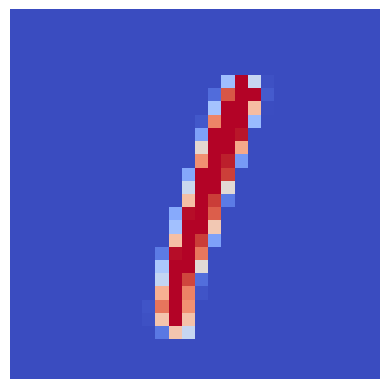

In [62]:
#real value
plt.imshow(x_test[5],cmap=plt.cm.coolwarm)
plt.axis(False)

In [63]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([8.5171133e-02, 2.9892189e-04, 5.2568585e-02, 6.3169372e-01,
       4.9360432e-03, 7.4218869e-02, 2.5261457e-05, 9.9941558e-01,
       2.4036579e-02, 7.6769882e-01], dtype=float32)

In [64]:
# Find the maximum value using numpy
np.argmax(y_predicted[0])

7

In [65]:
# converting y_predicted from whole numbers to integers 
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Using confusion matrix for validation

In [66]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    4,    2,    1,    3,    6,    1,    3,    0],
       [   0, 1107,    1,    3,    0,    2,    4,    1,   17,    0],
       [  11,   10,  900,   26,   14,    2,   13,   11,   41,    4],
       [   2,    1,   17,  925,    0,   24,    1,   17,   18,    5],
       [   2,    6,    4,    2,  906,    1,   11,    2,    7,   41],
       [  12,    3,    6,   49,    9,  757,   13,    8,   29,    6],
       [  18,    3,    7,    1,   10,   18,  896,    2,    3,    0],
       [   2,   12,   21,    9,    7,    0,    0,  937,    3,   37],
       [  10,    6,    9,   35,   12,   33,   12,   10,  833,   14],
       [  15,    7,    2,   15,   38,    9,    0,   26,    4,  893]],
      dtype=int32)>

Using seaborn to make confusion matrix look good

Text(95.72222222222221, 0.5, 'Truth')

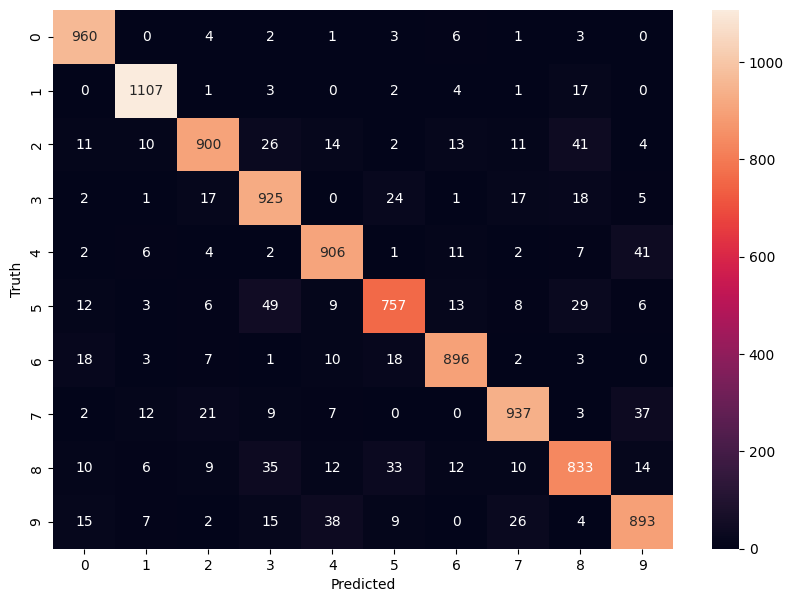

In [67]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Adding a hidden layer

In [68]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2487 - accuracy: 0.6788
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5267 - accuracy: 0.8660
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4031 - accuracy: 0.8921
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3553 - accuracy: 0.9014
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3301 - accuracy: 0.9063


Evaluate the accuracy on test set

In [69]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3113 - accuracy: 0.9110


[0.31131771206855774, 0.9110000133514404]

Now we can observe that by adding a hidden layer the accuracy increased from 92% to 97%.

Using confusion matrix for validation

313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

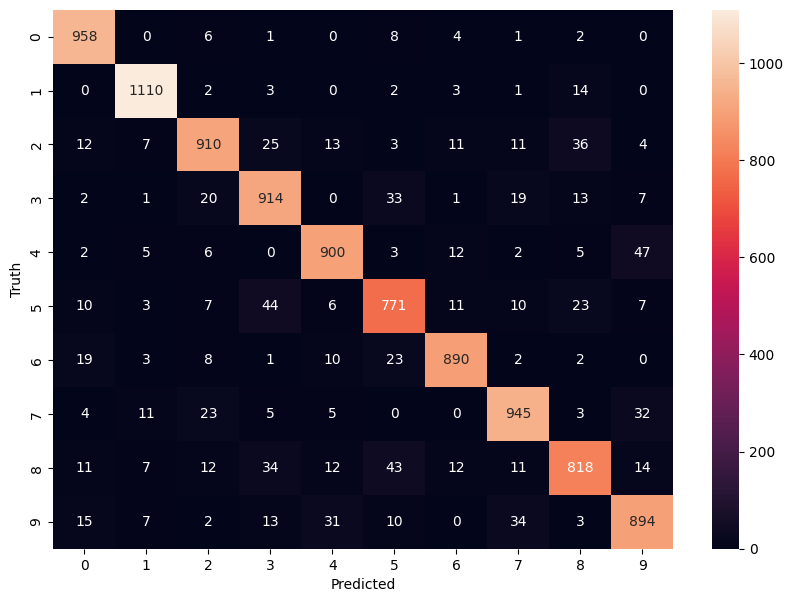

In [70]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Compared to the previous confusion matrix the wrong predictions has gone down. We can see that the diagonal values has increased and the values in black cells has gone down. There are more 0 valued black cells, meaning correct predictions.